/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.2579 - loss: 2.2394 - val_accuracy: 0.6528 - val_loss: 1.8748
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7276 - loss: 1.5858 - val_accuracy: 0.8472 - val_loss: 0.8758
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8763 - loss: 0.6289 - val_accuracy: 0.8958 - val_loss: 0.4263
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9133 - loss: 0.3088 - val_accuracy: 0.8889 - val_loss: 0.3707
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9503 - loss: 0.2307 - val_accuracy: 0.9271 - val_loss: 0.2550
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9561 - loss: 0.1745 - val_accuracy: 0.9340 - val_loss: 0.2205
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9688 - loss: 0.1374 - val_accuracy: 0.9375 - val_loss: 0.1752
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9834 - loss: 0.1127 - val_accuracy: 0.9583 - v

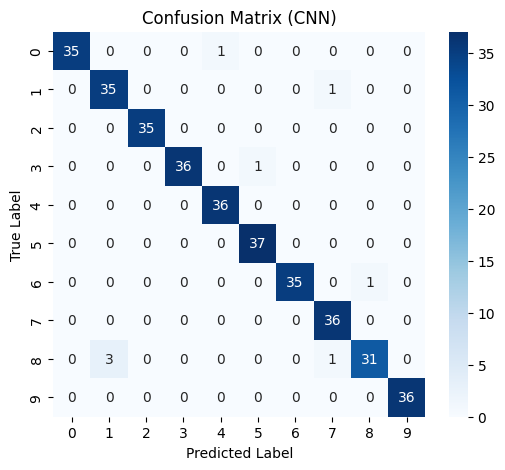

=== Classification Report (CNN) ===
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.97      0.95        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.95      1.00      0.97        36
           8       0.97      0.89      0.93        35
           9       1.00      1.00      1.00        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



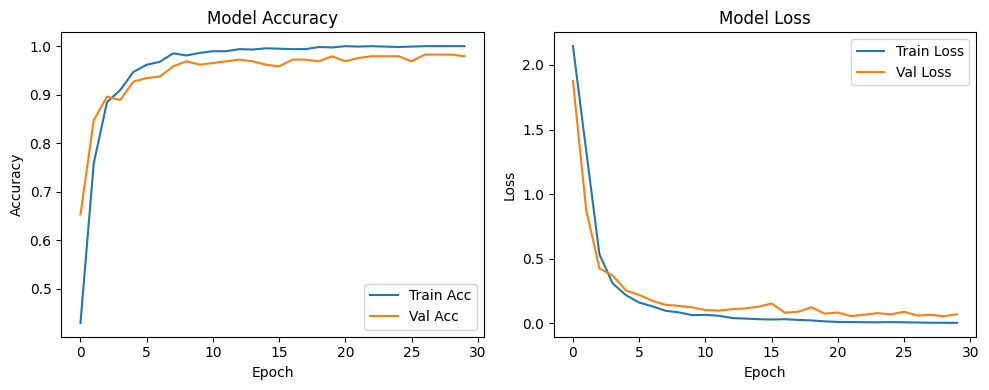

In [1]:
# ==========================================
# 1) 라이브러리 임포트
# ==========================================
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers

# ==========================================
# 2) 데이터 로드 및 전처리
# ==========================================
digits = datasets.load_digits()

# X, y를 numpy 배열로 변환
X = np.array(digits.data, dtype=np.float32)
y = np.array(digits.target)

# 정규화 (0~16 → 0~1)
X = X / 16.0

# CNN 입력에 맞게 reshape (8x8 grayscale image)
X = X.reshape(-1, 8, 8, 1)  # (샘플 수, 높이, 너비, 채널)

# ==========================================
# 3) 원-핫 인코딩
# ==========================================
num_classes = len(np.unique(y))
y_onehot = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# ==========================================
# 4) 데이터 분할 (Train/Test)
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# ==========================================
# 5) CNN 모델 정의
# ==========================================
model = models.Sequential([
    # Conv 블록 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Conv 블록 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # 완전연결층
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# ==========================================
# 6) 모델 컴파일
# ==========================================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ==========================================
# 7) 모델 학습
# ==========================================
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# ==========================================
# 8) 모델 평가
# ==========================================
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n=== Test Accuracy (CNN) : {test_acc:.4f} ===")

# ==========================================
# 9) 예측 및 혼동행렬
# ==========================================
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.title("Confusion Matrix (CNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ==========================================
# 10) 분류 리포트
# ==========================================
print("=== Classification Report (CNN) ===")
print(classification_report(y_true_classes, y_pred_classes))

# ==========================================
# 11) 학습 곡선 시각화
# ==========================================
plt.figure(figsize=(10,4))

# Accuracy 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
